<a href="https://colab.research.google.com/github/MathewS424/DeepLearning_with_PyTorch/blob/main/01_PyTorch_WorkFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01_PyTorch_WorkFlow
[Resourse Notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb)

In [1]:
what_we_cover = {
    1 : "data (prepare and load)",
    2 : "build model",
    3 : "fitting the model to data (training)",
    4 : "making predictions and evaluating a model (inference)",
    5 : "saving and loading a model",
    6 : "putting it all together"
}
what_we_cover

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building bloacks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.4.0+cu121'

## 1.Data (preparing and loading)

Data can be almost anything... in ML

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

ML IS A GAME OF TWO PARTS:

1.Get data   
2.Buid a model


To showcase this, let's  create some known data using the linear regression formula.

we'll use a linear regression formula to make a straight line with known **parameters.**

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data

In [5]:
#  create a train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]  #X[:40], y[:40]
X_test, y_test = X[train_split:], y[train_split:]   #X[40:], y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualize our data?

In [7]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  PLots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

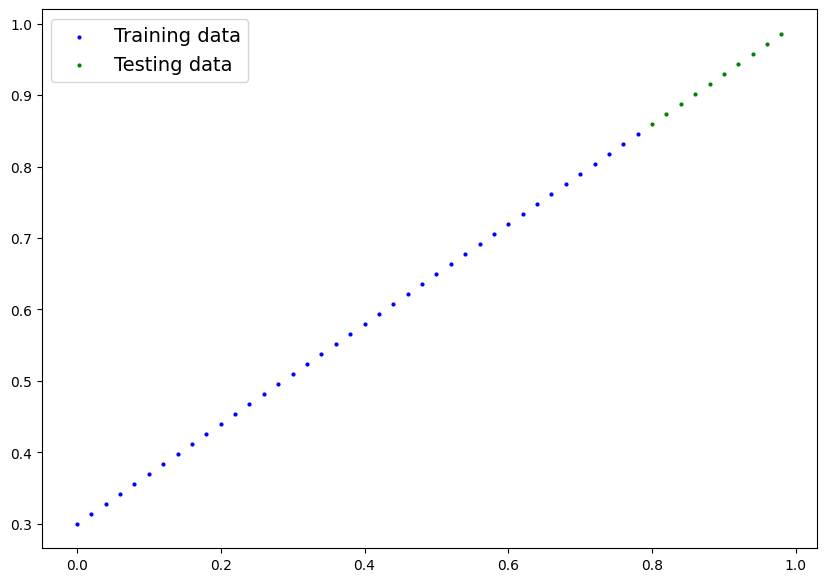

In [8]:
plot_predictions()

## 2.Build model

Our first PyTorch model!

### What our model does:
    * Start with random values (weight & bias)
    * Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

### How does it do so?

    Through two main algorithms:
    1. Gradient descent
    2. Backpropagation

In [9]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module):  # <- almost all models in PyTorch are a subclass of nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  # Forward defines the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:  # <- "x" is the input data (e.g. training/testing features)
    return self.weights * x + self.bias  # <- this is the linear regression formula (y = m*x + b)

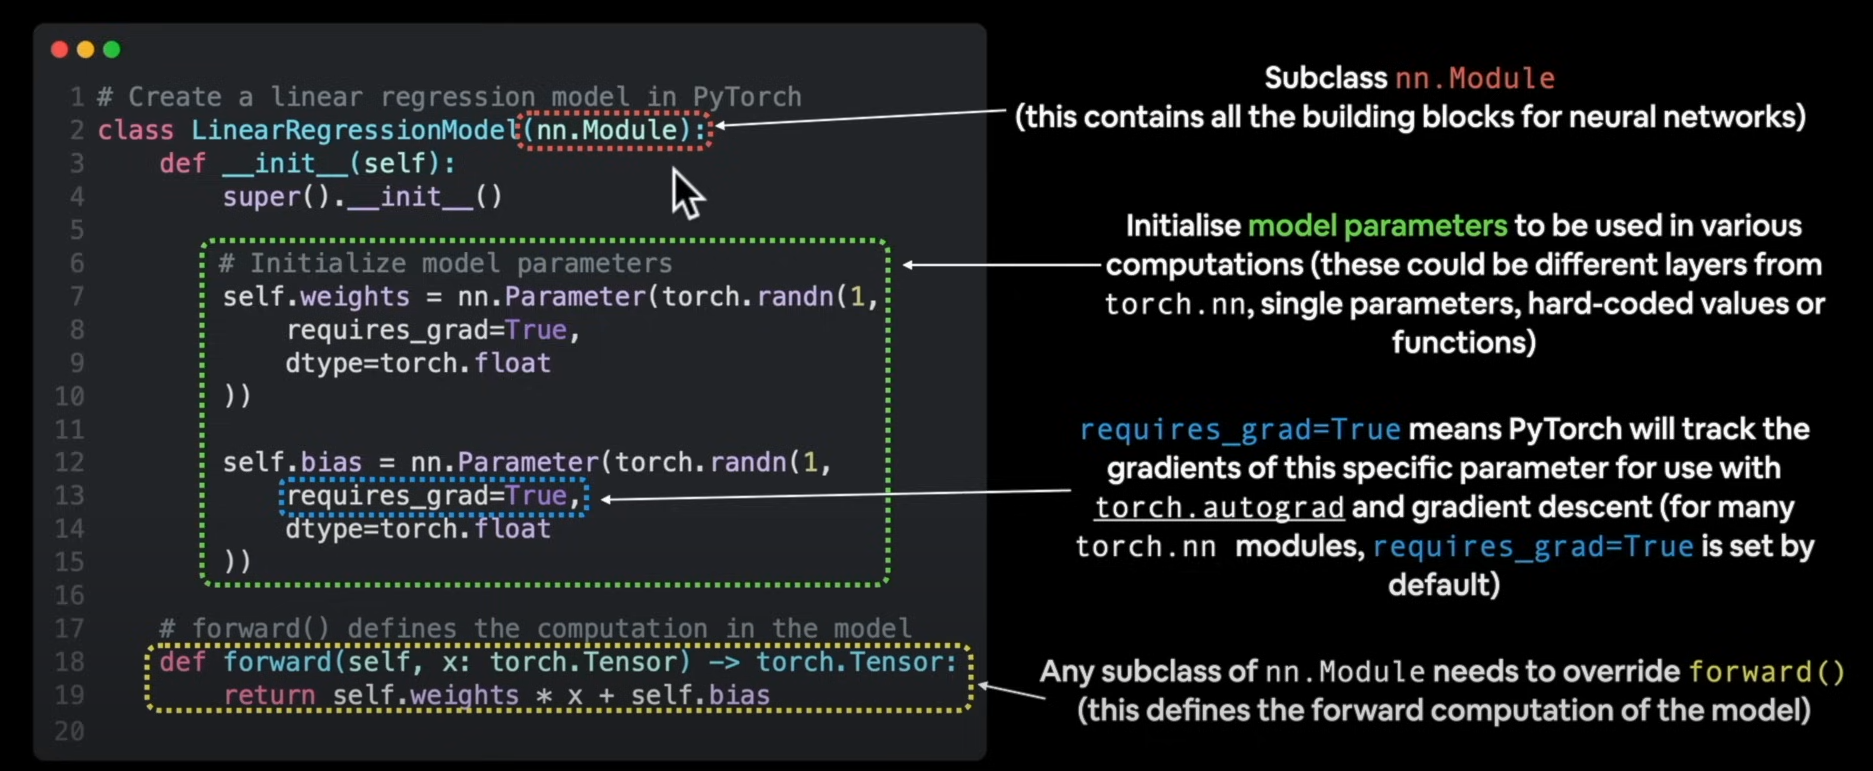

#### Understanding Normal and Uniform Distributions in PyTorch

#### 1. **Normal Distribution (Gaussian Distribution)**
- A **normal distribution** is a "bell-shaped" curve that represents data that clusters around a central mean (average) value.
- Most values are close to the mean, with fewer values appearing as you move further away from it.
- Example: Human heights often follow a normal distribution; most people are of average height, with fewer people being very short or very tall.

#### 2. **Uniform Distribution**
- A **uniform distribution** is flat, meaning all values in the range have an equal probability of occurring.
- There is no central clustering point; values are evenly spread.
- Example: Rolling a fair six-sided die is uniform because each number (1 to 6) has an equal chance of appearing.

#### Key Differences:
- **Normal Distribution** has a bell shape with most values near the mean.
- **Uniform Distribution** is flat with values spread evenly across the range.

### In PyTorch:
- `torch.randn(1)` generates a number from a **normal distribution** centered around 0.
- `torch.rand(1)` generates a number from a **uniform distribution** between 0 and 1.

These concepts help in initializing parameters in machine learning models and simulating real-world data.

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs(a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from `torch.nn` will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this were the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to oveerwrite forward(), this method defines what happens in the forward computation

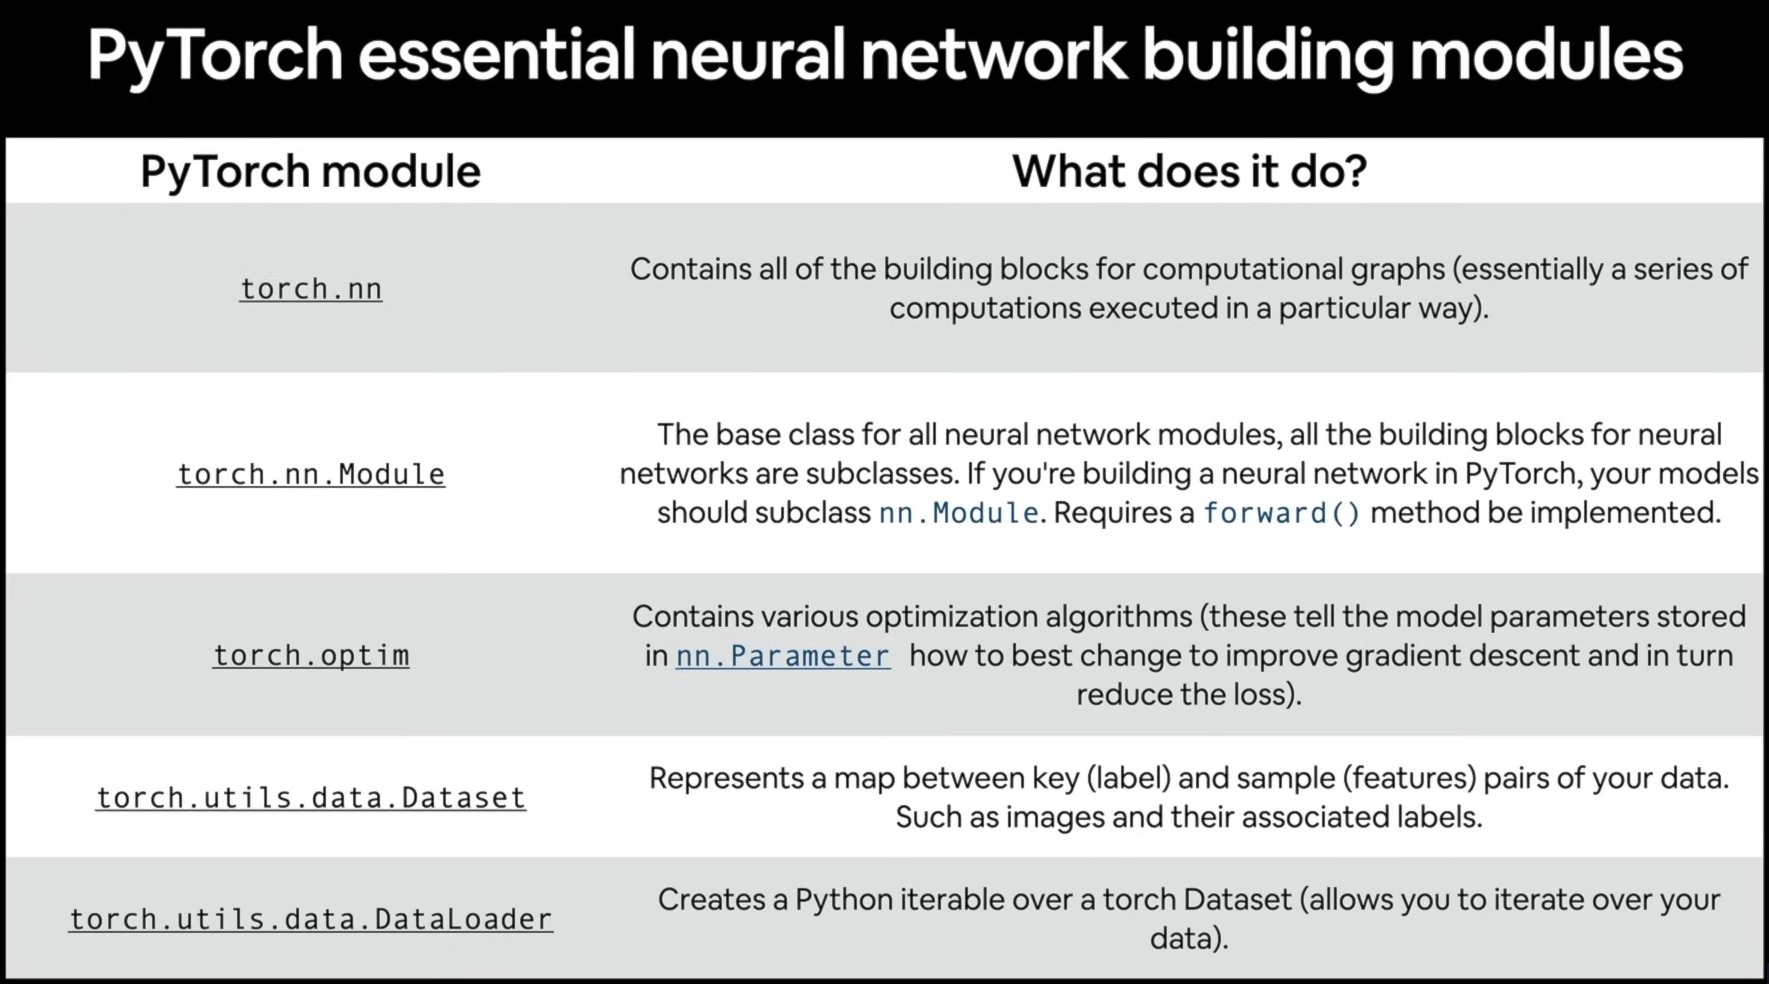

### Checking the contents of our PyTorch model

So we check model parameters or what's inside our model using           `.parameters()`

In [10]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
weight , bias  # we want the above outputs weights and bias == 0.7 and 0.3 closer, sice its easy or small data we know the value of ideal weight and bias for large data we don't know the weight and bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

To check our model's power,let's see how well it predicts y_test based on X_test.

When we pass data through our model, its going to run it through the forward() method.

In [13]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [14]:
# Make predictions with model
with torch.inference_mode():     # Turn off gradient , or torch.no_grad()
    y_preds = model_0(X_test)

# You can also fo something similar with torch.no_grad(), however, torch.inference_mode() is preferred
# with torch.no_grad():
#     y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

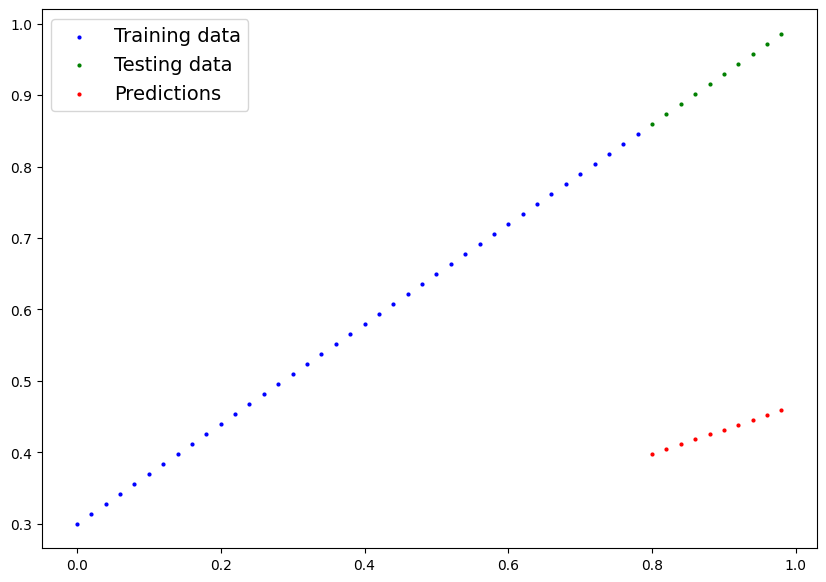

In [15]:
plot_predictions(predictions=y_preds)

### Usage in Training vs. Testing
Training: Neither torch.no_grad() nor torch.inference_mode() should be used during training since training requires gradient calculation for backpropagation.

Testing/Inference: Both are used during testing or inference to reduce memory usage and speed up computations.


`torch.no_grad()`     
Purpose:

Disable Gradient Calculation: torch.no_grad() is used to turn off gradient tracking, which is useful during model evaluation or inference when gradients are not required. This reduces memory usage and speeds up computations by not storing intermediate variables needed for backpropagation.           
Main Use Case:                

Primarily used during testing or inference (not training) to save memory and computational resources since gradients are not needed.
When to Use:

Any time you are running a forward pass of your model for inference (i.e., making predictions) and do not need to compute gradients.


`torch.inference_mode()`    
Purpose:

Maximize Performance for Inference: torch.inference_mode() goes a step further than torch.no_grad(). It not only disables gradient computation but also disables certain autograd engine features (like version counters for tensors) that are not needed during inference. This can result in even more performance gains, especially in high-performance inference settings.    
Main Use Case:

Used exclusively for inference to further optimize performance. It is not meant for any operation where gradients might be required.
When to Use:

When you are confident that you are only performing inference and want the best possible performance, such as in deployment scenarios.


#### Key Differences
Scope of Optimization:

torch.no_grad(): Only disables gradient tracking.
torch.inference_mode(): Disables gradient tracking and certain autograd engine features to optimize performance further.

Use Cases:

torch.no_grad() can be used during both validation and testing where gradients are not needed, but where some autograd features might still be required.

torch.inference_mode() is strictly for scenarios where you're doing pure inference and want maximum performance optimization.


#### Summary:

torch.no_grad(): Use when you don't need gradients (e.g., for validation or evaluation).

torch.inference_mode(): Use when you're only doing inference and want the most optimized performance.

## 3.Train model

The whole idea of training is for a model to move from some unknown parameters(these may be random) to some known parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss Function**: A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

* **Optimizer**: Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias)


And Specifically for PyTorch, we need:
* A training loop
* A testing loop

In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
#Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001) # lr =learning rate = imp hyperparameters you can set ,higher the lr it adjust the parameter high
                            # lower the lr it adjust the parameter low
                            # lr=0.1 means update weights 0.3 part, lr=0.01 update 0.33(last 3 is updated), lr=0.001 means update weights 0.336(6 in it is updated)

In [19]:
loss_fn

L1Loss()

**Q:** Which loss function and optimizer should I use ?

**A:**This is problem specific.But with experience we can sort it.

  For example; for regression problem -loss function `nn.L1Loss()` , optimizer `torch.optim.SGD()`

  For cassification problems like whether a photo is of a dog or cat, loss function `nn.BCELoss()` (binary cross entropy loss)

### Building a training loop (ans a testing loop) in PyTorch

We need in a training loop:
1. Loop through the data
2. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data- also called forward propagation
3. Calculate the loss(compare forward pass predictions to ground truth labels)
4. Optimizer zero grad
5. Loss Backward - move backward through the network to calculate the **gradients** of each of the parameters of our model with respect to the **loss** (**backpropagation**)
6. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [20]:
# An epoch is one loop through the data(this is a hyperparameter because we've set it)
epochs = 1

### Training
# 0.  Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train()  # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()  # by default how the optimizer changes will accumulate through the loop... we have to zero them above in step 3 for the next iteration of the loop

  model_0.eval()  # turns off gradient tracking


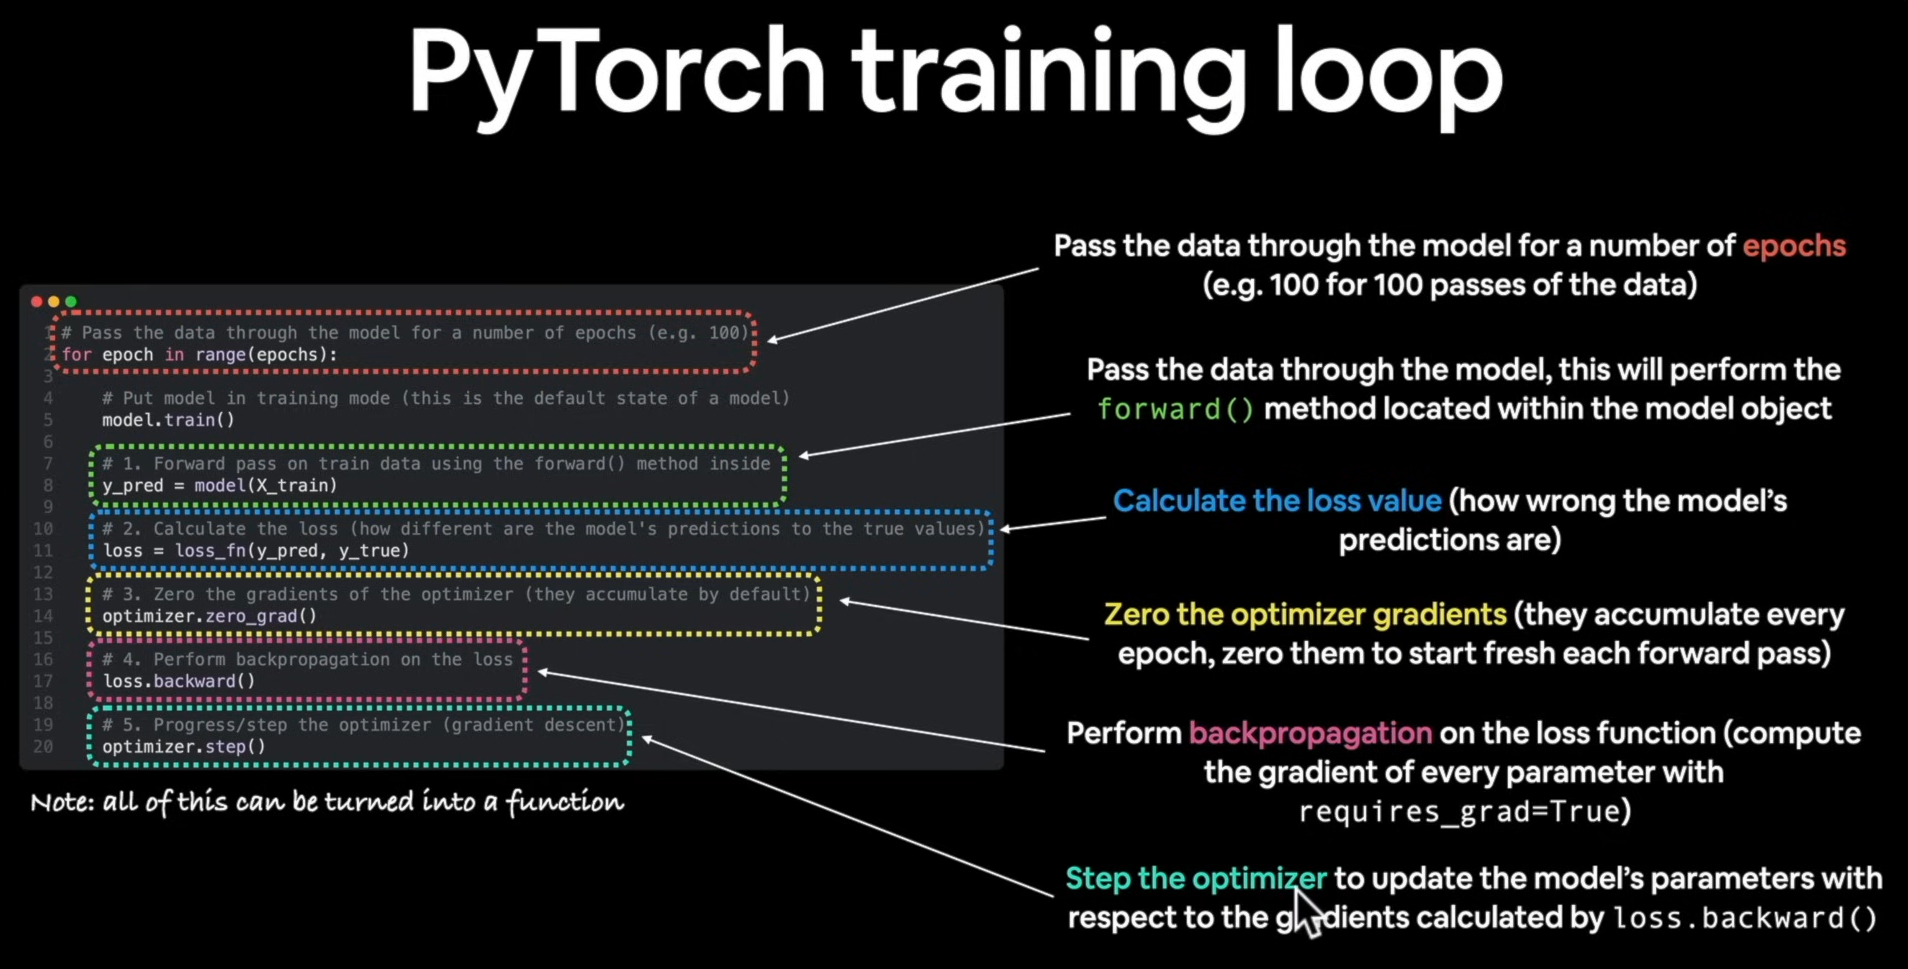